#**Tutorial 7: Impact of Climate Variability - Precipitation**

> Indented block

> Indented block




**Week 1, Day 3, Remote Sensing**

**Content creators:** Douglas Rao

**Content reviewers:** TBD

**Content editors:** TBD

**Production editors:** TBD

**Our 2023 Sponsors:** TBD

#**Tutorial Objectives**

In this tutorial, you will learn how to use satellite data to research the impact of large scale climate variability on precipitation.

By the end of this tutorial you will be able to:

* Understand the impact of ENSO on precipitation and its spatial pattern.
* Calculate Pearson's correlation coefficient between two time series.


#**Setup**



In this section, we have:


1.   **Import cell:** imports all libraries you use in the tutorial.
2.   **Hidden Figure settings cell:** sets up the plotting style (copy exactly)
1.   **Hidden Plotting functions cell:** contains all functions used to create plots throughout the tutorial (so students don't waste time looking at boilerplate matplotlib but can here if they wish to). Please use only matplotlib for plotting for consistency.
2.   **Hidden Helper functions cell:** This should contain functions that students have previously used or that are very simple. Any helper functions that are being used for the first time and are important should be placed directly above the relevant text or exercise (see Section 1.1 for an example).
    



In [1]:
#Imports

# Import only the libraries/objects that you use in this tutorial. 

# If any external library has to be installed, !pip install library --quiet
# follow this order: numpy>matplotlib. 
# import widgets in hidden Figure settings cell

# Properly install cartopy in colab to avoid session crash
!apt-get install libproj-dev proj-data proj-bin --quiet
!apt-get install libgeos-dev --quiet
!pip install cython --quiet
!pip install cartopy --quiet

!apt-get -qq install python-cartopy python3-cartopy  --quiet
!pip uninstall -y shapely  --quiet
!pip install shapely --no-binary shapely  --quiet

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs

Reading package lists...
Building dependency tree...
Reading state information...
libproj-dev is already the newest version (7.2.1-1~focal0).
libproj-dev set to manually installed.
proj-data is already the newest version (7.2.1-1~focal0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 170 kB of archives.
After this operation, 485 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal/main amd64 proj-bin amd64 7.2.1-1~focal0 [170 kB]
Fetched 170 kB in 1s (340 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../proj-bin_7.2.1-1~focal0_amd64.deb ...
Unpacking proj-bin (7.2.1-1~focal0) ...
Setting up proj-bin (7.2.1-1~focal0) ...
Processing triggers for man-db (2.9.1-1) ...
Reading package lists...
Building dependency tree...

In [2]:
# @title Figure settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")


#**Section 1: ENSO and precipitation**

In [ ]:
# @title Video 1: Video 1 Name 
#Tech team will add code to format and display the video

As a large scale climate variability, ENSO pattern shifts back and forth between El Nino and La Nina phases irregularly every two to seven years. These shifts between two different phases often bring predictable changes in ocean surface temperature and disrupting the wind and rainfall patterns across the tropics. These changes have a cascade of global side effects.

Here, we are using satellite data to examine the impact of ENSO on precipitation data.

##**Section 1.1: Get ENSO Index (ONI)**

In last tutorial, we generated the Oceanic Nino Index using the OISST Climate Data Records. Now we just read the ONI value using the climatology of 1982-2011.


In [6]:
oni = xr.open_dataset('/asset/data/t6_oceanic-nino-index.nc')
oni

<xarray.Dataset>
Dimensions:  (time: 499)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-03-01
    month    (time) int32 ...
Data variables:
    sst      (time) float32 ...

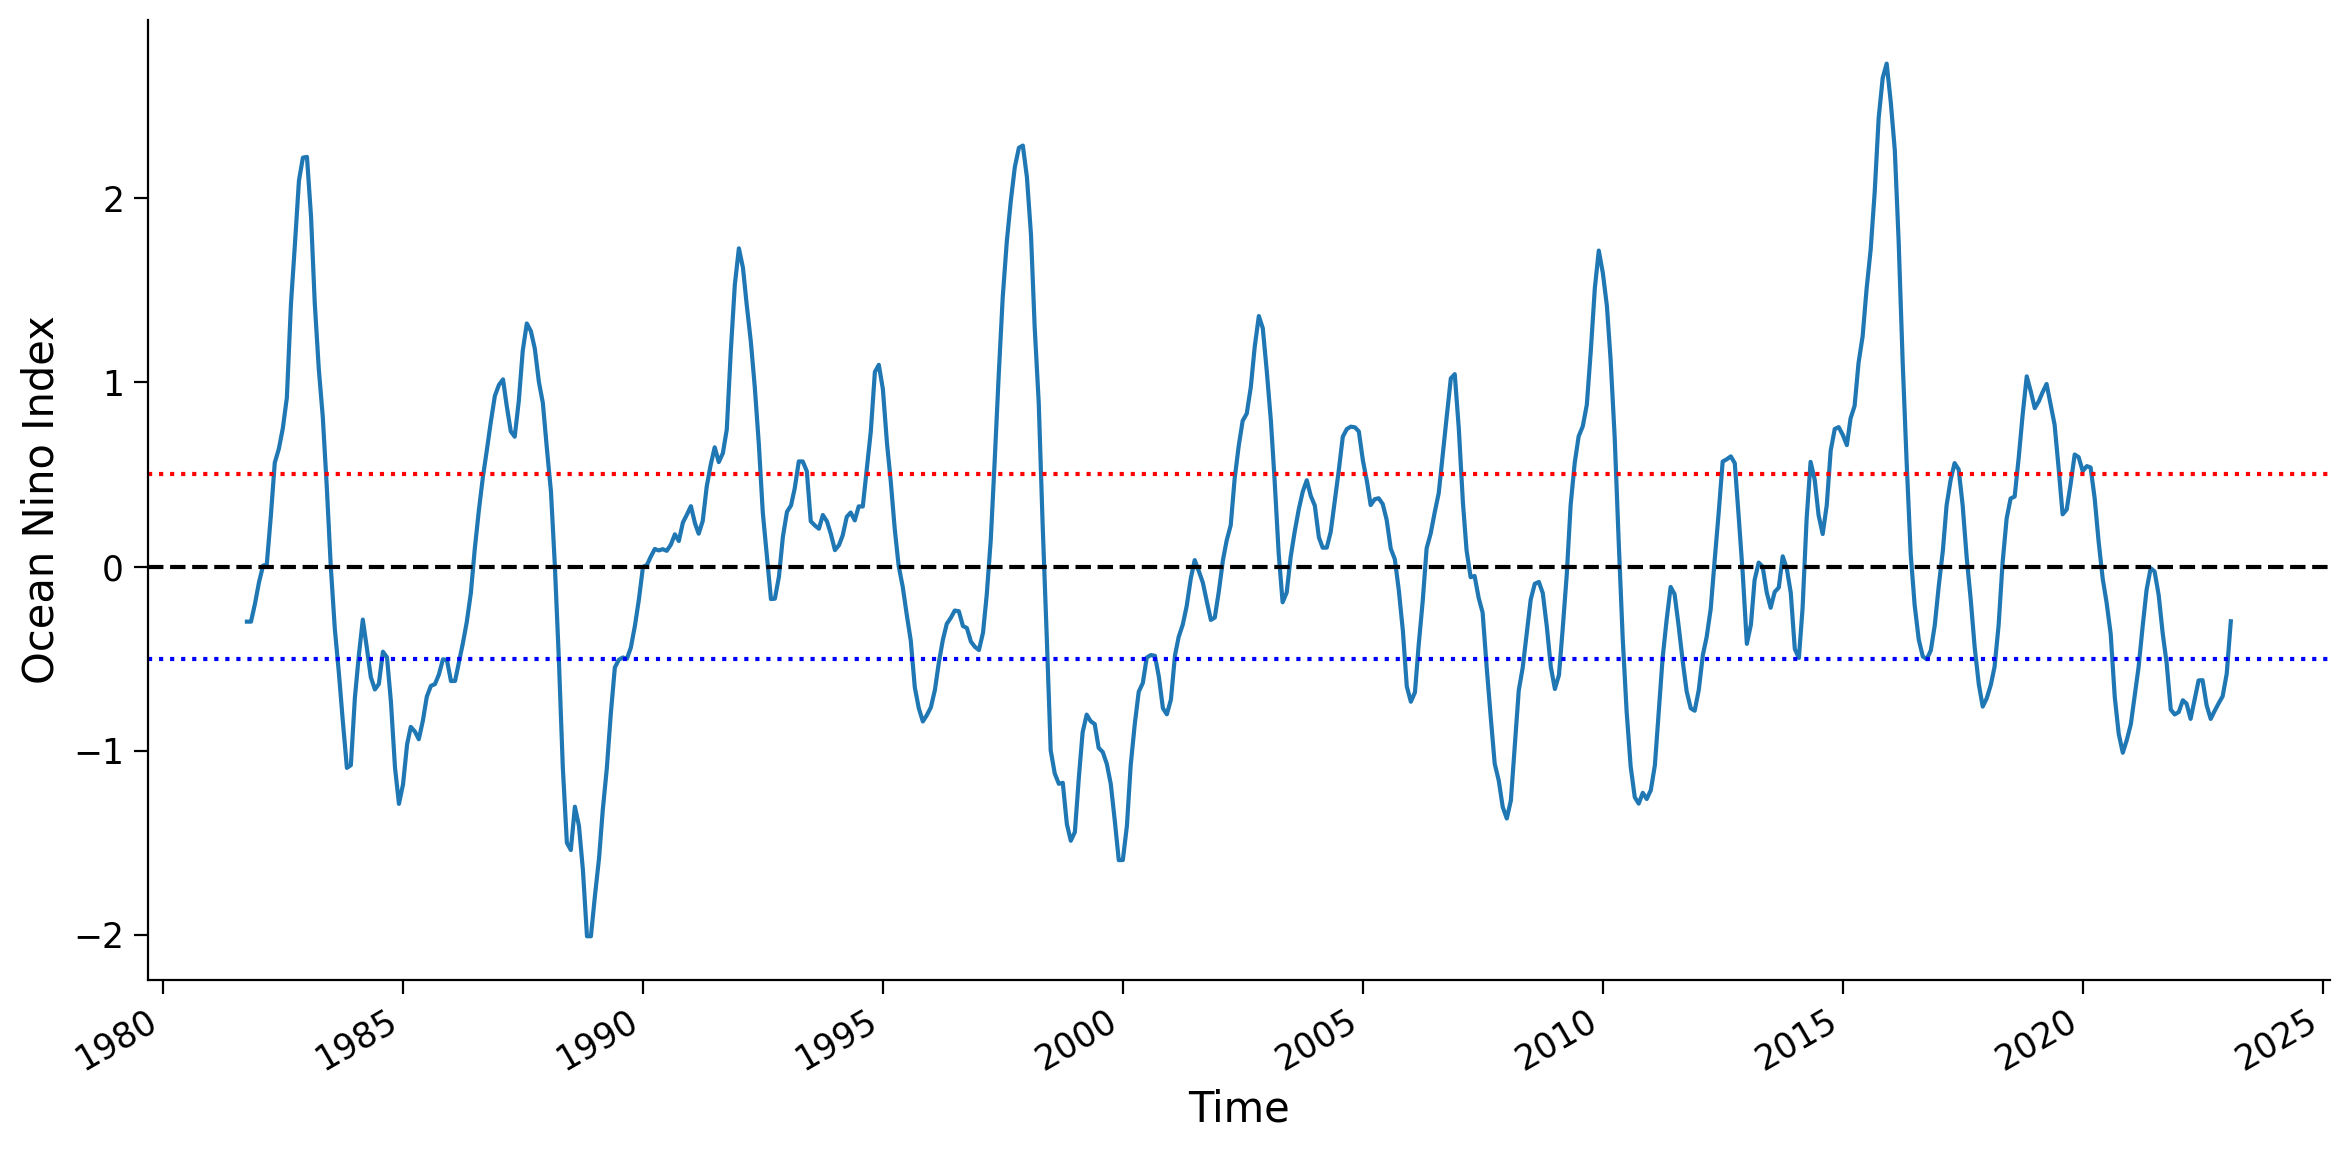

In [11]:
fig=plt.figure(figsize=(12,6))
oni.sst.plot()
plt.ylabel('Ocean Nino Index')
plt.axhline(y=0, linestyle='dashed', color='k')
plt.axhline(y=0.5, linestyle='dotted', color='r')
plt.axhline(y=-0.5, linestyle='dotted', color='b')

## **Section 1.2: Get Precipitation Anomaly Data**

In tutorial 5, we created the monthly anomaly data of precipitation globally using the GPCP Monthly Precipitation Climate Data Records. Here, we read in the anomaly data and look at one specific month (e.g., 1998-01-01).

In [12]:
precip = xr.open_dataset('/asset/data/t5_gpcp-monthly-anomaly_1981-2010.nc')
precip

<xarray.Dataset>
Dimensions:    (time: 528, latitude: 72, longitude: 144)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
    month      (time) int32 ...
  * longitude  (longitude) float32 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * latitude   (latitude) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
Data variables:
    precip     (time, latitude, longitude) float32 ...

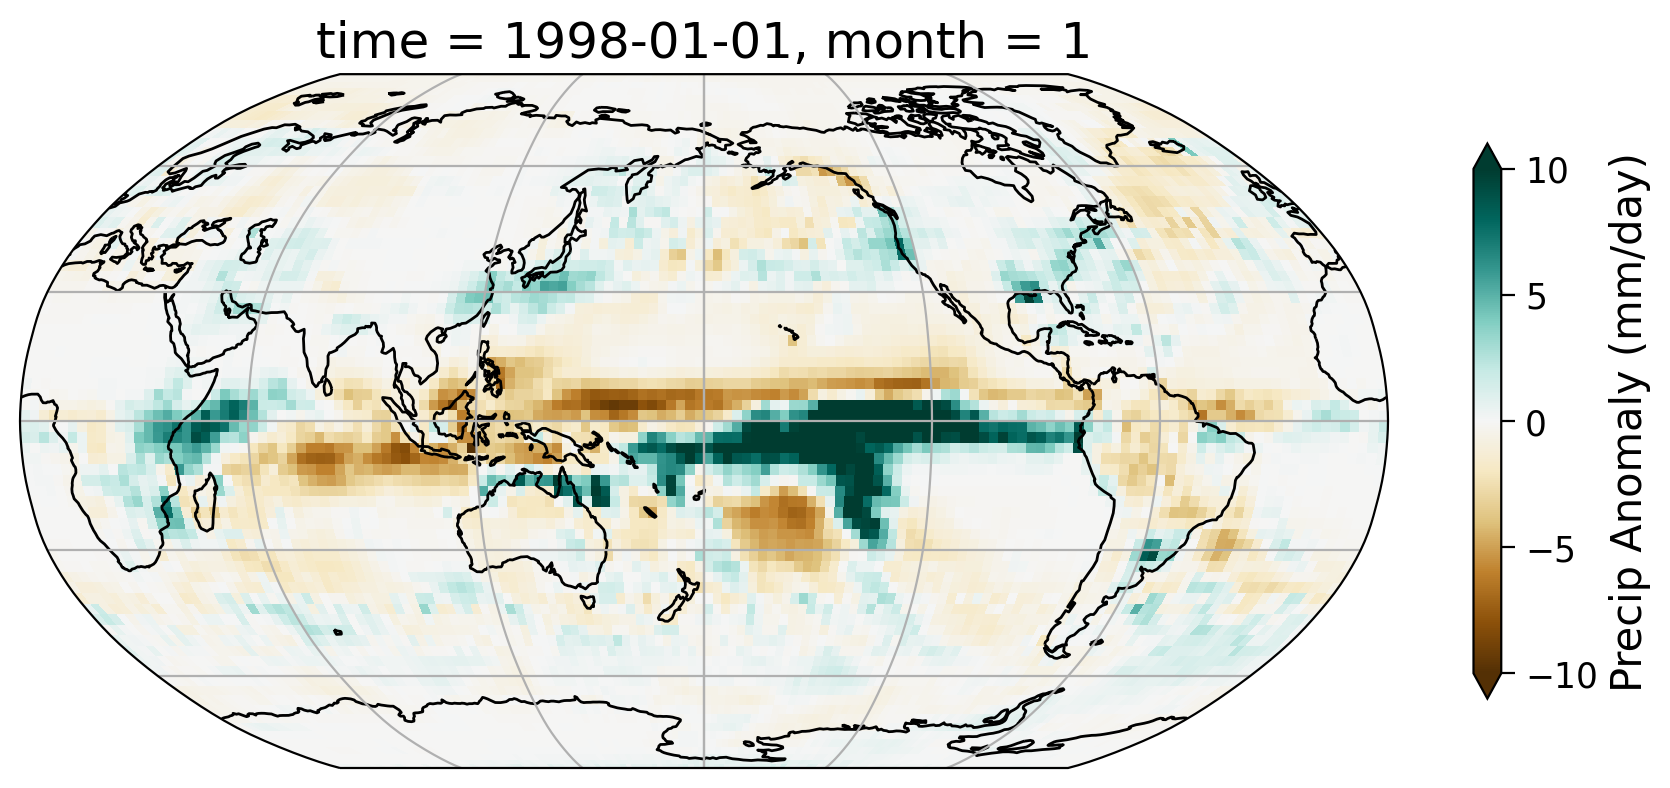

In [15]:
data=precip.sel(time='1998-01-01')
# Initate plot
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()
data.precip.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin = -10, vmax = 10, cmap='BrBG',
         cbar_kwargs=dict(shrink=0.5, label='Precip Anomaly (mm/day)'))

## **Section 1.3: Spatial Pattern**

Let's look at one specific ENSO phase - El Nino in 1997/1998 and see how the spatial pattern of the precipitation evolves. The 1997/1998 is one of the most significant ENSO events started around May 1997 and ended April 1998.

For nearly one year, let's examine the precipitation anomaly pattern every season.

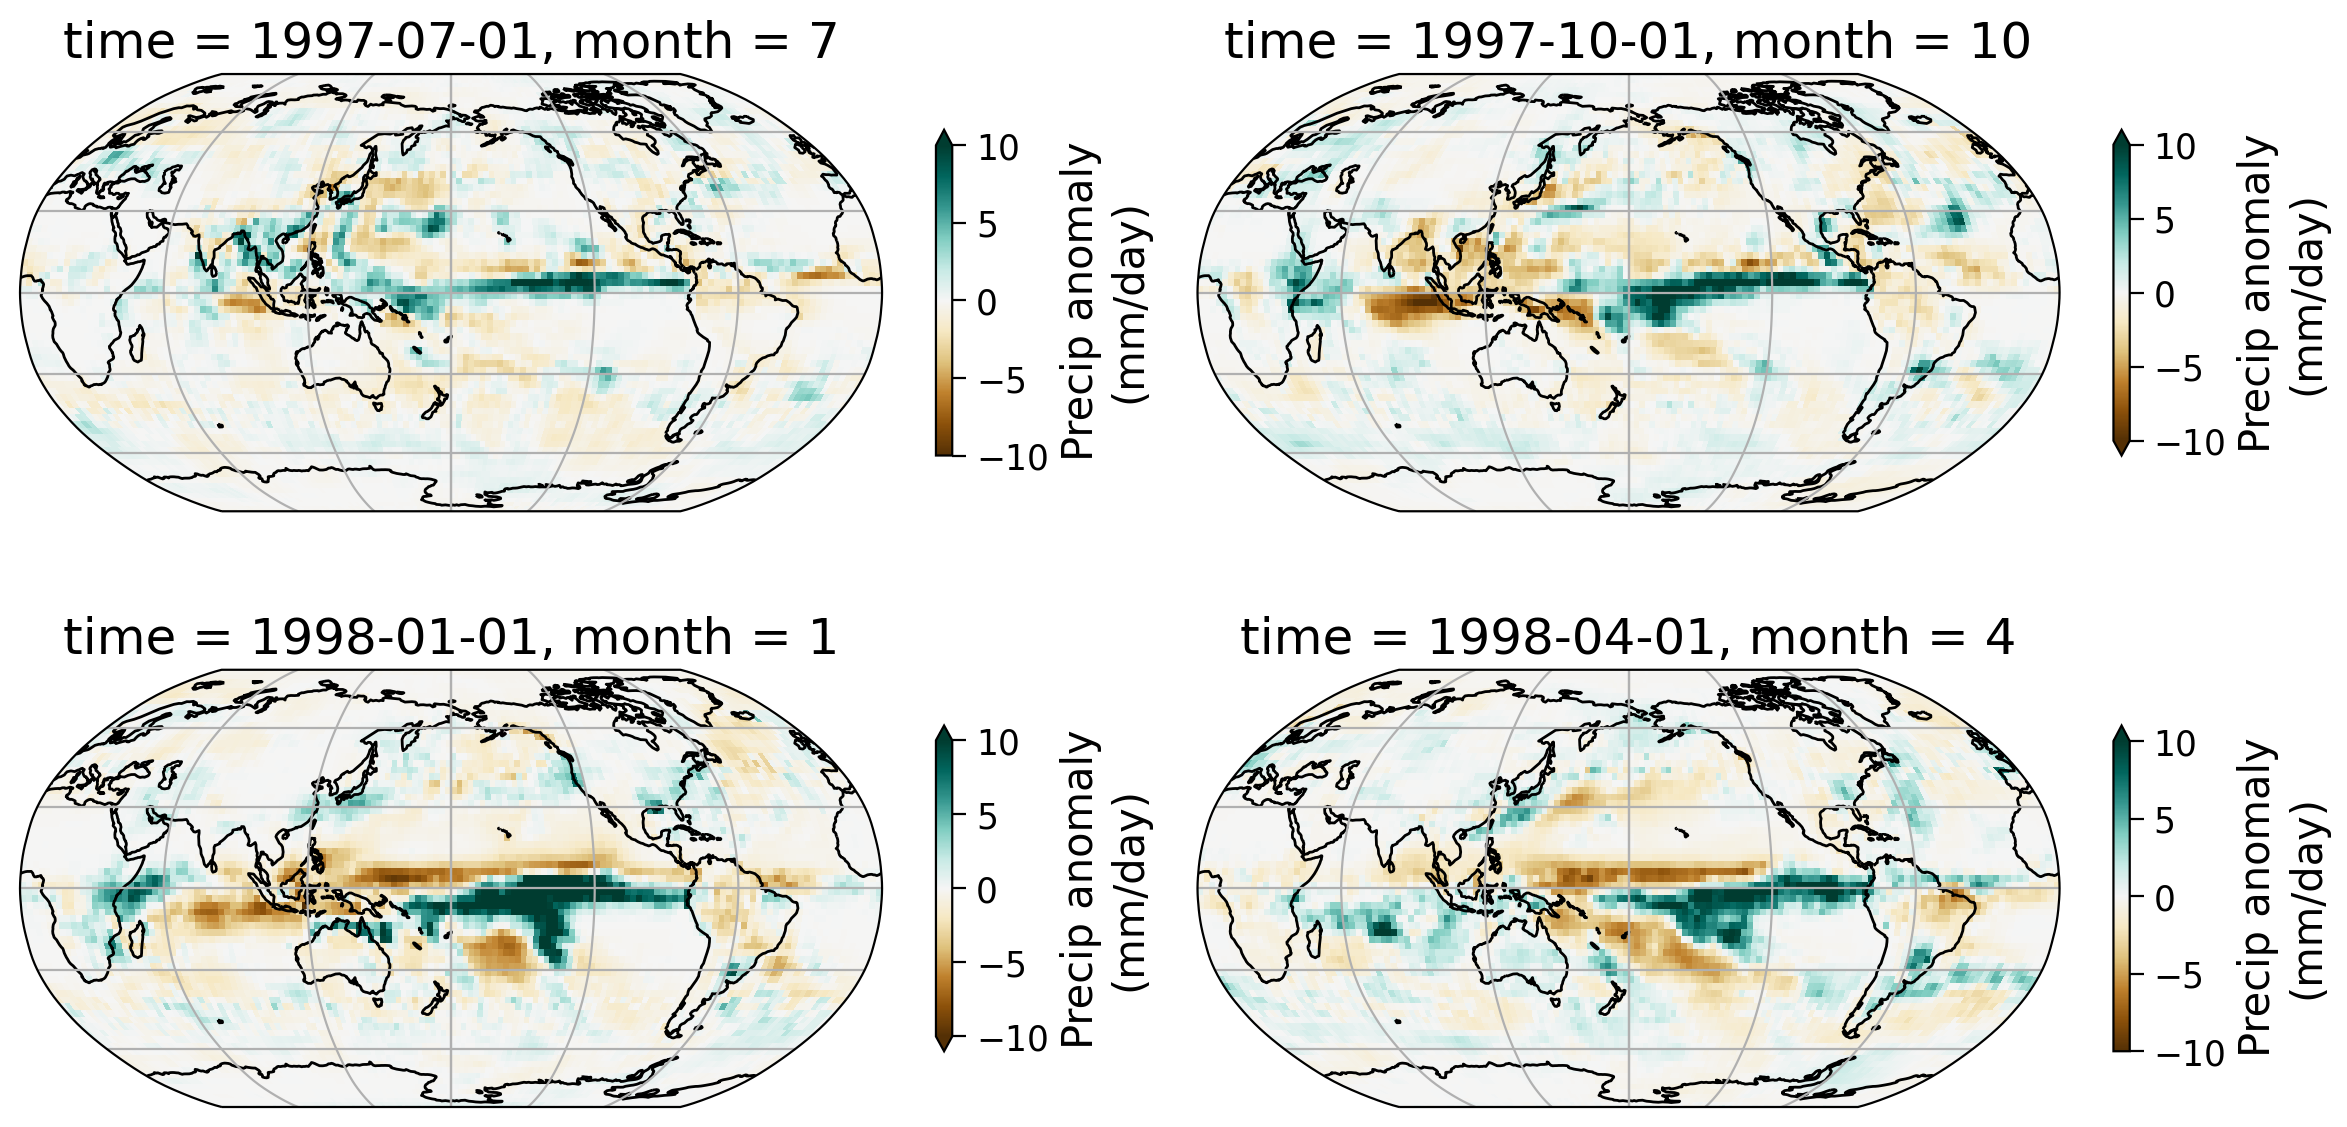

In [20]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.Robinson(central_longitude=180)},
                        figsize=(12,7.5), sharex=True, sharey=True)

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over selected months (Jan, Apr, Jul, Oct)
for i,month in enumerate(['1997-07-01','1997-10-01','1998-01-01','1998-04-01']):

        # Draw the coastines and major gridline for each subplot
        axs[i].coastlines()
        axs[i].gridlines()
        
        # Draw the precipitation anomaly data
        precip.precip.sel(time=month).plot(ax=axs[i], transform=ccrs.PlateCarree(),
                   vmin = -10, vmax = 10, # use the same range of max and min value
                   cmap = 'BrBG',
                   cbar_kwargs=dict(shrink=0.4, label='Precip anomaly\n(mm/day)')) 

In this set of four monthly maps, we can clearly see the precipitation pattern change over the tropics and other regions on land. 

The most direct changes are the increae and decrease of precipitation over the topical ocean where ENSO is monitored. The warmer SST in the Nino 3.4 regions (i.e., El Nino phase) directly correlates of the increase of the rainfall in the region as El Nino intensified.

We can also see the change of rainfall pattern in other parts of the tropics and North and South America (e.g., the Amazon).

## **Section 2: Correlation Analysis**

Beyond visual inspection, we can also quantify the correlation between the ENSO (ONI) and the precipitation anomaly for the region of our interest.

Let's use Nino 3.4 region as an example to calculate the coorelation berween precipitation and ONI.

In [24]:
# Extract precipitation data for the Nino 3.4 region & the same time period with ONI data
precip_nino34 = precip.sel(latitude=slice(-5,5), 
                           longitude=slice(190,240), 
                           time=slice('1981-09-01', '2022-12-01'))
precip_nino34

<xarray.Dataset>
Dimensions:    (time: 496, latitude: 4, longitude: 20)
Coordinates:
  * time       (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2022-12-01
    month      (time) int32 ...
  * longitude  (longitude) float32 191.2 193.8 196.2 198.8 ... 233.8 236.2 238.8
  * latitude   (latitude) float32 -3.75 -1.25 1.25 3.75
Data variables:
    precip     (time, latitude, longitude) float32 ...

In [27]:
# Calculate regional mean of the precipitation anomaly
precip_nino34_mean = precip_nino34.mean(('latitude', 'longitude'))
# Extract ONI value for the common period (ending at 2022-12-01)
nino34 = oni.sel(time=slice('1981-09-01', '2022-12-01'))

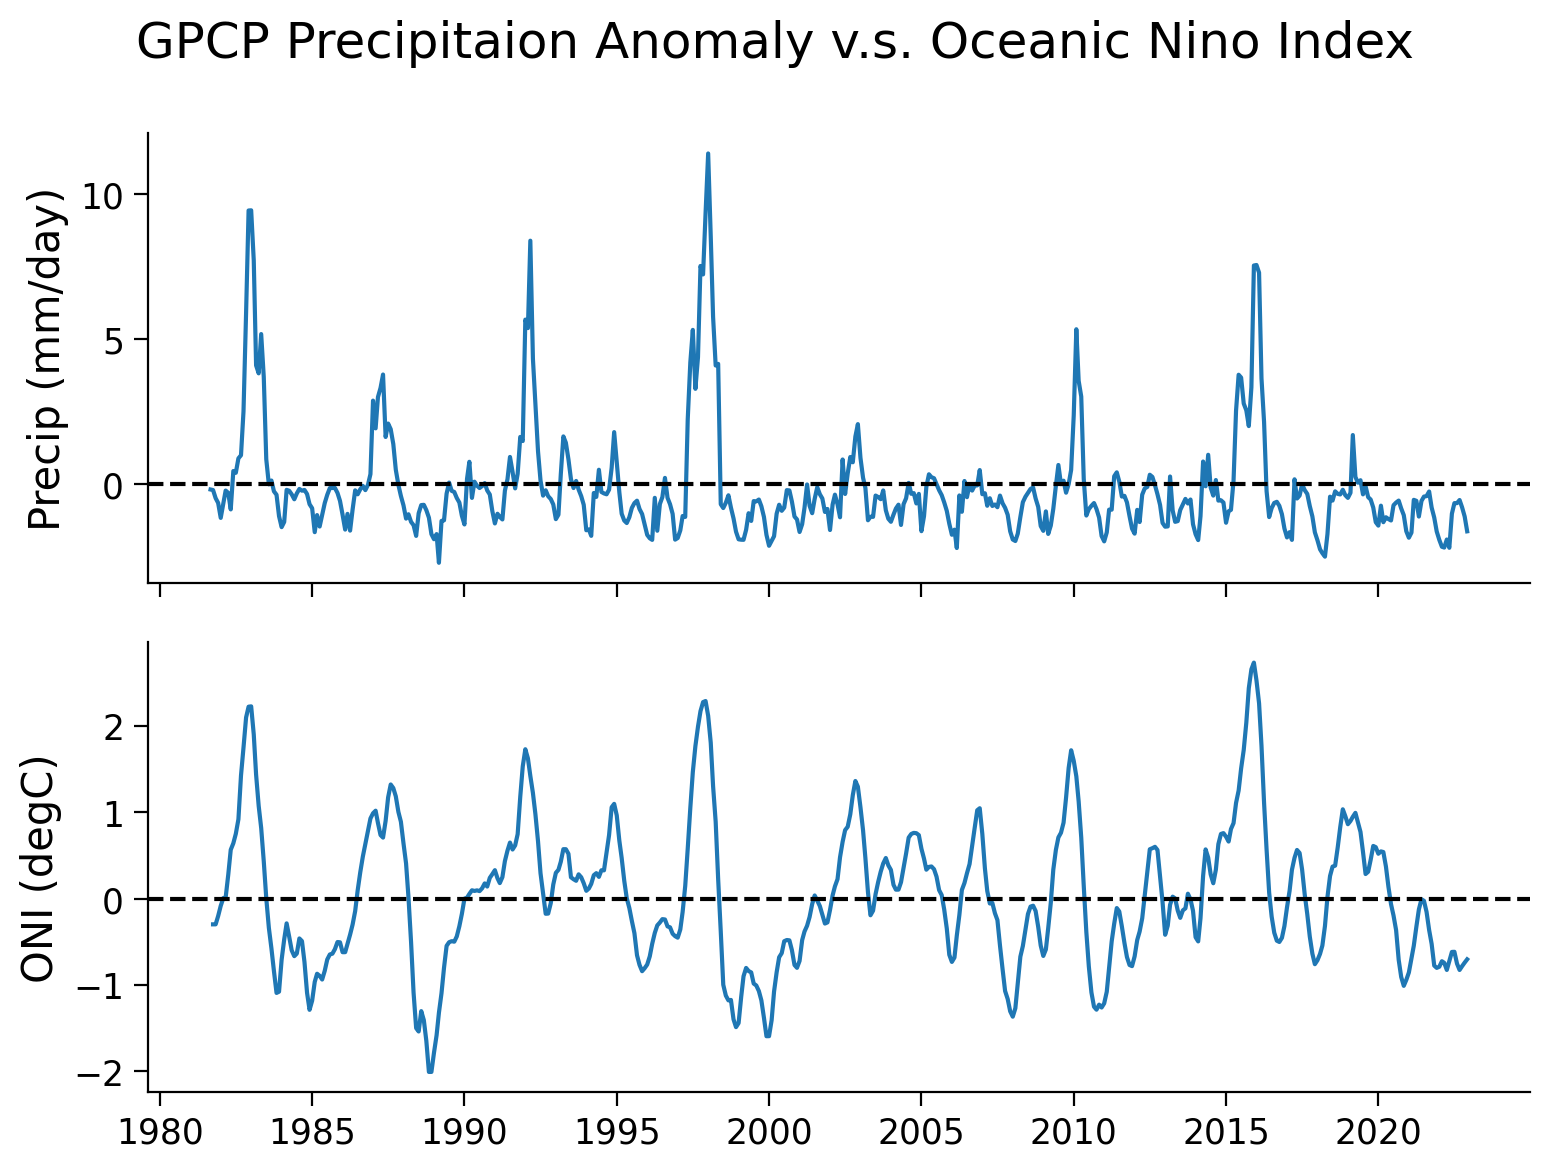

In [35]:
# Set up two subplots that share the x-axis to compare precipitation anomaly and
# ONI index
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('GPCP Precipitaion Anomaly v.s. Oceanic Nino Index')
axs[0].plot(precip_nino34_mean.time, precip_nino34_mean.precip)
axs[0].set_ylabel('Precip (mm/day)')
axs[0].axhline(y=0, color='k', linestyle='dashed')
axs[1].plot(nino34.time, nino34.sst)
axs[1].set_ylabel('ONI (degC)')
axs[1].axhline(y=0, color='k', linestyle='dashed')

From the pattern of these two time series, we can see a clear pattern of synchronized change of precipitation anomaly and the ONI value for ENSO. Now, we can generate a scatter plot to further examine the pattern.

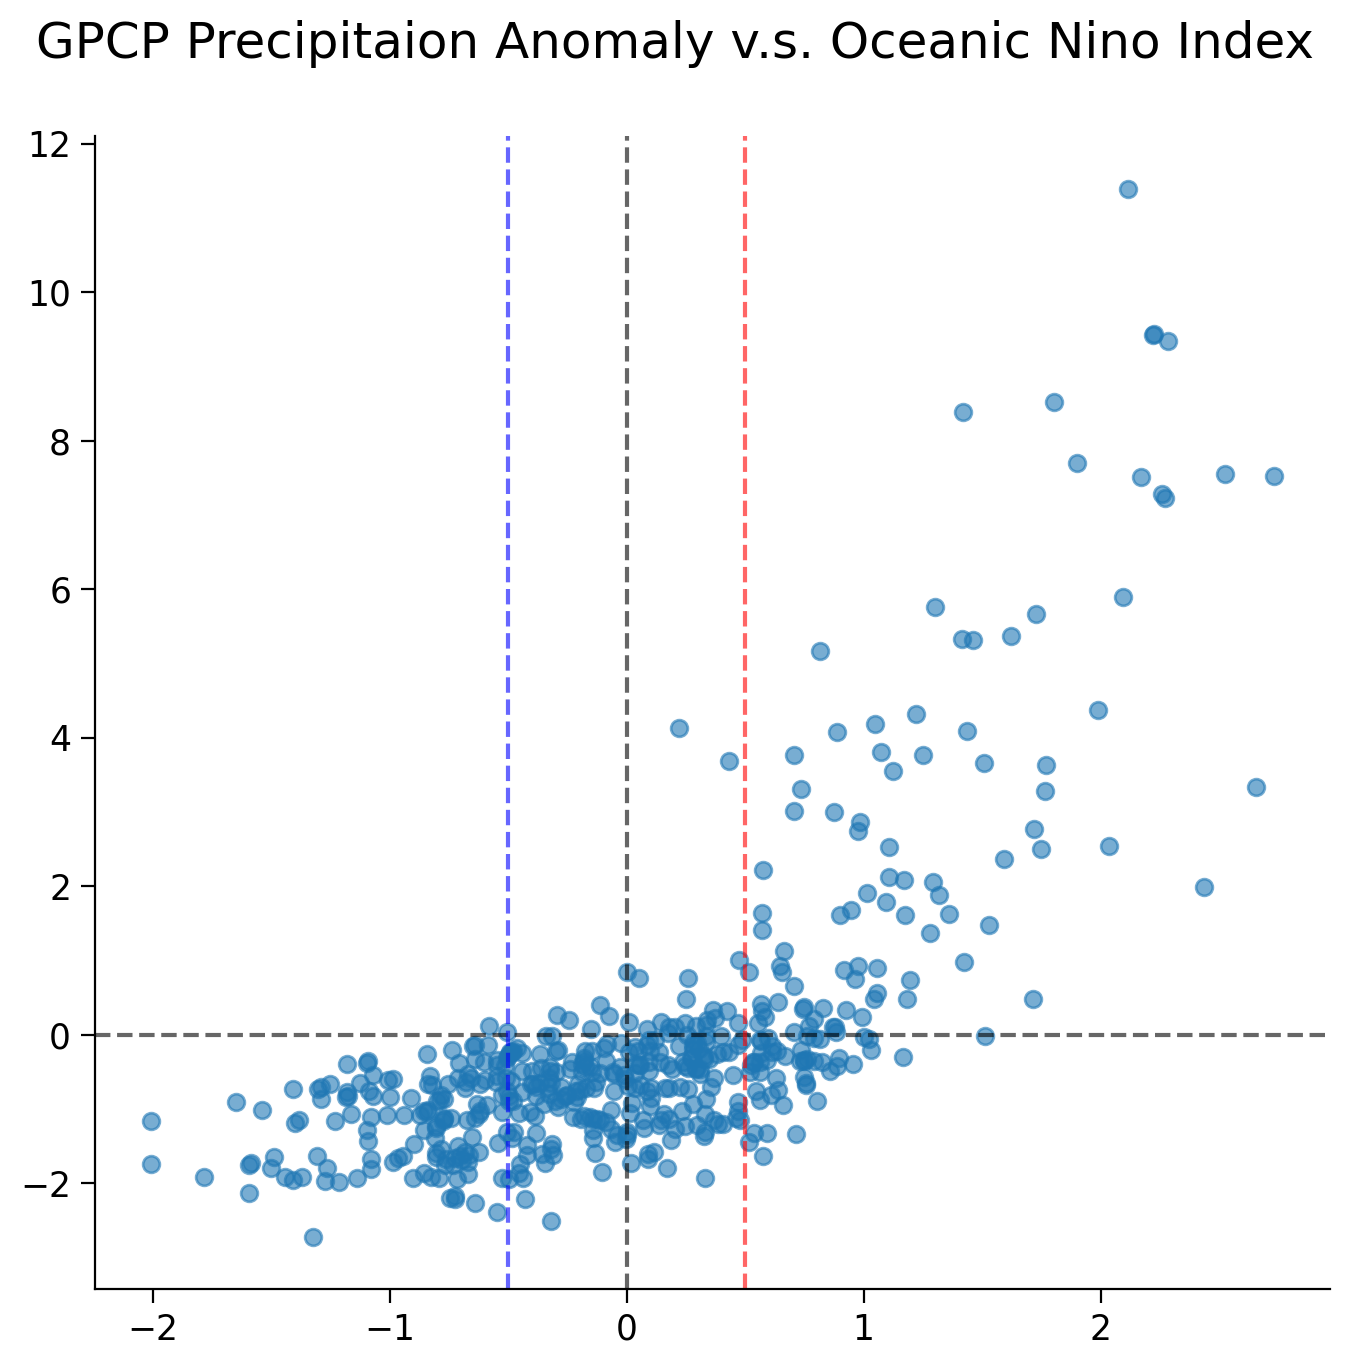

In [40]:
# Set up two subplots that share the x-axis to compare precipitation anomaly and
# ONI index
fig = plt.figure(figsize=(7,7))
fig.suptitle('GPCP Precipitaion Anomaly v.s. Oceanic Nino Index')
plt.scatter(nino34.sst, precip_nino34_mean.precip, alpha=0.6)
# Add horizontal and vertical lines of 0 values
plt.axhline(y=0, linestyle='dashed', color='k', alpha=0.6)
plt.axvline(x=0, linestyle='dashed', color='k', alpha=0.6)
plt.axvline(x=0.5, linestyle='dashed', color='r', alpha=0.6) #El Nino threshold
plt.axvline(x=-0.5, linestyle='dashed', color='b', alpha=0.6) #La Nina threshold

We can observe a notable correlation between the regionally averaged precipitation anomaly with the ONI values.

We will now calculate the Pearson's Correlation between the precipitation anomaly and ONI values using `.corr()` from `xarray`.

In [44]:
# Calculate the pearson's correlation using `.corr()`
xr.corr(nino34.sst, precip_nino34_mean.precip)

<xarray.DataArray ()>
array(0.72492702)

The correlation coefficient of 0.72 indicates that the two variables are highly correlated, which confirms our observation based on the time series.

Now can you take a look at other regions such as Amazon rainforest to see if ENSO affects the rainfall pattern there?

### **Exercise 2.1: Examine rainfall anomaly and ONI relationship**

You can choose a region of your interest to examine the relationship between ENSO (using ONI data) and precipitation anomaly globally. 

In [ ]:
################################################################################
# Exercise: Examine relationship between ENSO and precipitation anomaly.       #
################################################################################

# Step 1: Define region of interest for the precipitation anomaly

# Step 2: Calculate regional mean time series

# Step 3: Plot the time serise of precipitation anomaly and ONI for the same 
#         time period using two subplots

# Step 4: Plot scatter plot between precipitation and ONI

# Step 5: Calculate correlation coefficient

# Step 6: Create maps to examine the spatial pattern of a significant ENSO phase
#         (e.g., 1997/1998 El Nino or 1988/1989 La Nina)

'''

Please describe the relationship between the ENSO and the regional precipitation
pattern:

'''

#**Summary**

In this tutorial, we learned how to assess the relationship between precipitation and large-scale climate variability.

* ENSO has a notable impact on the precipitation pattern in the tropics and the impact will propogate to other regions of the globe.
* Pearson's correlation coefficient can be used to study the potential correlation. But correlation need to be further examined with physical explanations to make sure the signal is meaningful information rather than a coincidence.
